In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv("/content/drive/MyDrive/diamonds.csv")

In [4]:
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

In [5]:
df.shape

(219703, 25)

In [6]:
df.head()

,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,culet_size,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,N,...,1.79,M,M,unknown,None,unknown,unknown,unknown,unknown,200
1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,N,...,1.78,STK,STK,unknown,None,unknown,unknown,unknown,unknown,200
2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,unknown,...,1.77,TN,M,unknown,None,unknown,unknown,unknown,unknown,200
3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,unknown,...,1.78,M,STK,unknown,None,unknown,unknown,unknown,unknown,200
4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,N,...,1.82,STK,STK,unknown,None,unknown,unknown,unknown,unknown,200


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219703 entries, 0 to 219702
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   cut                          219703 non-null  object 
 1   color                        219703 non-null  object 
 2   clarity                      219703 non-null  object 
 3   carat_weight                 219703 non-null  float64
 4   cut_quality                  219703 non-null  object 
 5   lab                          219703 non-null  object 
 6   symmetry                     219703 non-null  object 
 7   polish                       219703 non-null  object 
 8   eye_clean                    219703 non-null  object 
 9   culet_size                   219703 non-null  object 
 10  culet_condition              219703 non-null  object 
 11  depth_percent                219703 non-null  float64
 12  table_percent                219703 non-null  float64
 13 

In [8]:
df.describe()

,carat_weight,depth_percent,table_percent,meas_length,meas_width,meas_depth,total_sales_price
count,219703.000000,219703.000000,219703.000000,219703.000000,219703.000000,219703.000000,2.197030e+05
mean,0.755176,61.683768,57.747585,5.548853,5.135626,3.285699,6.908062e+03
std,0.845894,9.915266,9.959928,1.763924,1.374529,2.054822,2.595949e+04
min,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000e+02
25%,0.310000,61.200000,57.000000,4.350000,4.310000,2.680000,9.580000e+02
50%,0.500000,62.400000,58.000000,5.060000,4.800000,3.030000,1.970000e+03
75%,1.000000,63.500000,60.000000,6.350000,5.700000,3.630000,5.207000e+03
max,19.350000,98.700000,94.000000,93.660000,62.300000,76.300000,1.449881e+06


# numerical columns:carat_weight, depth_percent, table_percent, meas_length, meas_width, meas_depth	,total_sales_price

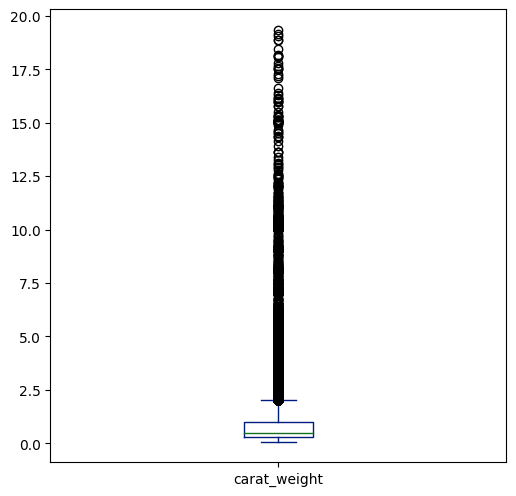

In [9]:
sns.set_palette(palette='dark', n_colors=14)
df['carat_weight'].plot(kind='box',figsize=(20,20),subplots=True,layout=(3,3))

plt.show()

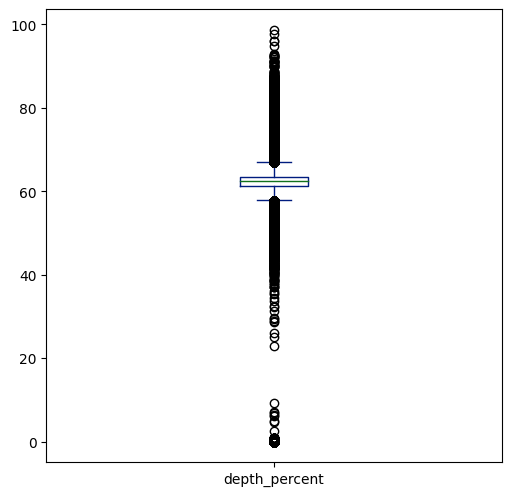

In [10]:
sns.set_palette(palette='dark', n_colors=14)
df['depth_percent'].plot(kind='box',figsize=(20,20),subplots=True,layout=(3,3))

plt.show()

#depth_percent and table_percent are the relative measurements of the flat part of the top and the depth. This varies somewhat by cut.

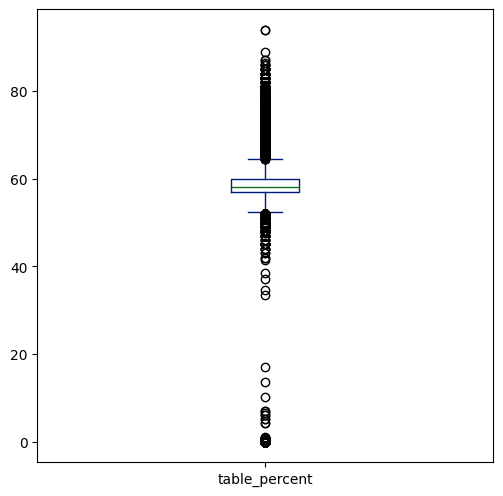

In [11]:
sns.set_palette(palette='dark', n_colors=14)
df['table_percent'].plot(kind='box',figsize=(20,20),subplots=True,layout=(3,3))

plt.show()

In [12]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [13]:
label_encoder = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = label_encoder.fit_transform(df[column])


In [14]:
df #used label encoding insted of one hot encoding as it increase the model complexity and the data takes time to train.

,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,culet_size,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,10,1,10,0.09,0,2,4,4,4,3,...,1.79,0,0,5,2,12,10,8,9,200
1,10,1,10,0.09,4,2,4,4,4,3,...,1.78,1,1,5,2,12,10,8,9,200
2,10,1,10,0.09,0,2,4,4,4,8,...,1.77,4,0,5,2,12,10,8,9,200
3,10,1,10,0.09,0,2,4,4,4,8,...,1.78,0,1,5,2,12,10,8,9,200
4,10,1,10,0.09,4,2,4,0,4,3,...,1.82,1,1,5,2,12,10,8,9,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219698,10,1,7,10.65,0,0,0,0,4,3,...,8.66,0,1,5,2,12,10,8,9,1210692
219699,9,10,8,5.17,5,0,4,4,4,8,...,5.71,3,7,5,2,5,10,3,5,1292500
219700,10,1,7,18.07,0,0,0,0,4,3,...,10.20,4,0,5,2,12,10,8,9,1315496
219701,8,10,5,0.90,5,0,2,2,4,3,...,3.47,8,5,5,0,10,10,8,1,1350000


In [15]:
scaler = StandardScaler()
numerical_cols = ['carat_weight', 'depth_percent', 'table_percent', 'meas_length', 'meas_width', 'meas_depth', 'girdle_min', 'girdle_max']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [16]:
df

,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,culet_size,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,10,1,10,-0.786360,0,2,4,4,4,3,...,-0.727899,-1.046233,-1.258519,5,2,12,10,8,9,200
1,10,1,10,-0.786360,4,2,4,4,4,3,...,-0.732765,-0.797402,-0.989494,5,2,12,10,8,9,200
2,10,1,10,-0.786360,0,2,4,4,4,8,...,-0.737632,-0.050912,-1.258519,5,2,12,10,8,9,200
3,10,1,10,-0.786360,0,2,4,4,4,8,...,-0.732765,-1.046233,-0.989494,5,2,12,10,8,9,200
4,10,1,10,-0.786360,4,2,4,0,4,3,...,-0.713299,-0.797402,-0.989494,5,2,12,10,8,9,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219698,10,1,7,11.697498,0,0,0,0,4,3,...,2.615465,-1.046233,-0.989494,5,2,12,10,8,9,1210692
219699,9,10,8,5.219132,5,0,4,4,4,8,...,1.179814,-0.299742,0.624658,5,2,5,10,3,5,1292500
219700,10,1,7,20.469299,0,0,0,0,4,3,...,3.364923,-0.050912,-1.258519,5,2,12,10,8,9,1315496
219701,8,10,5,0.171208,5,0,2,2,4,3,...,0.089692,0.944410,0.086607,5,0,10,10,8,1,1350000


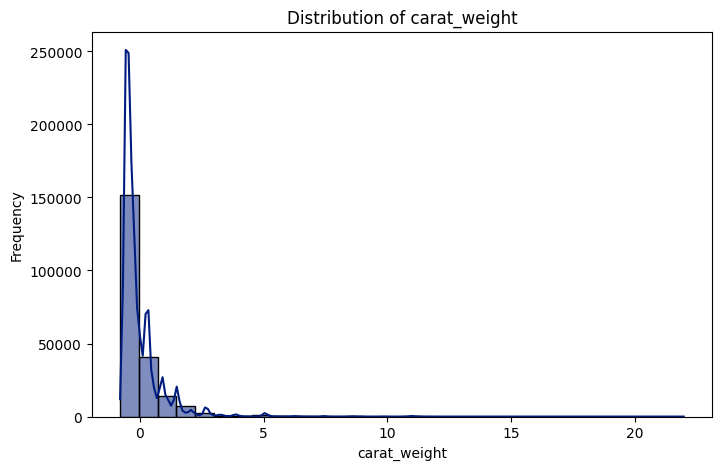

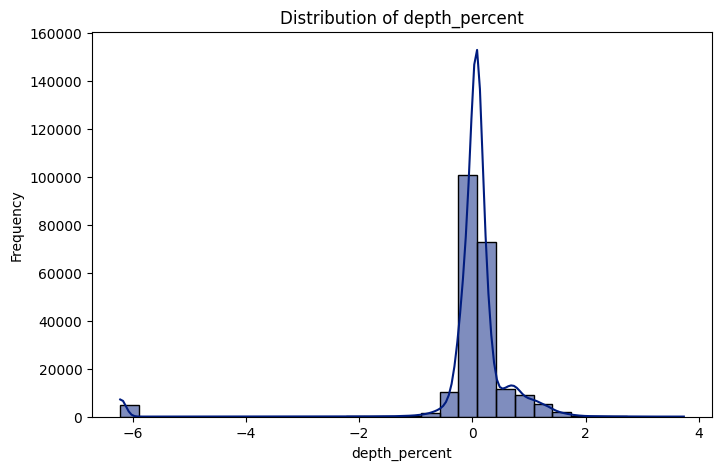

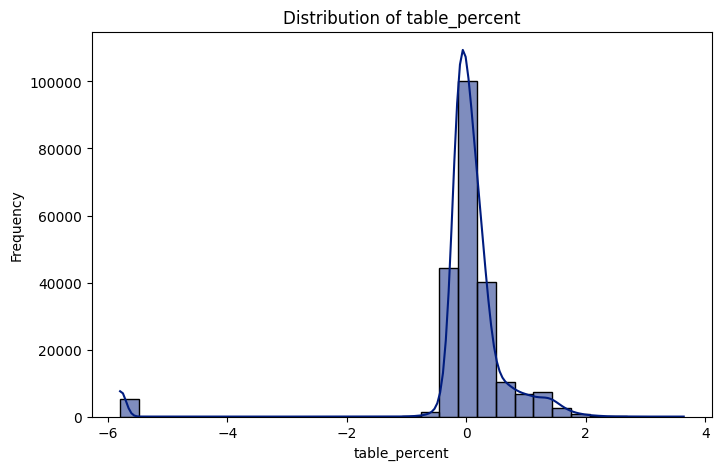

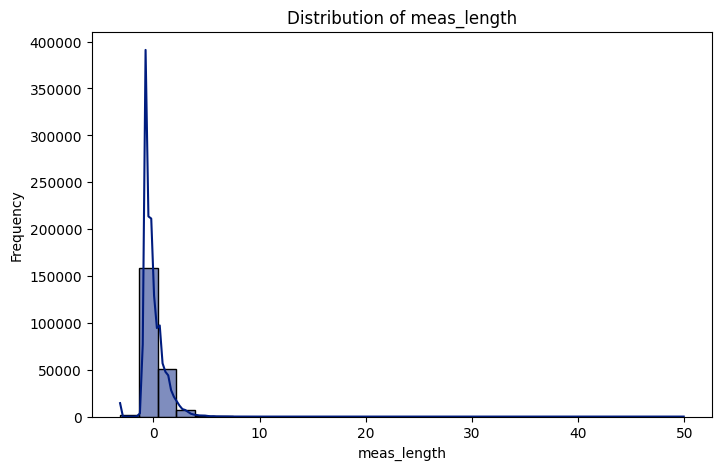

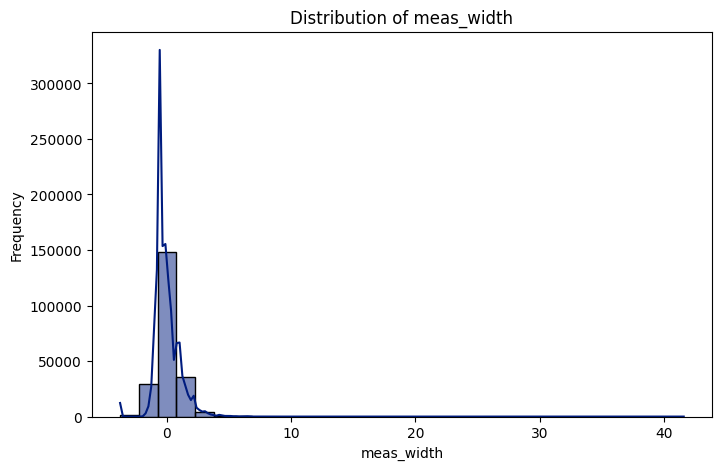

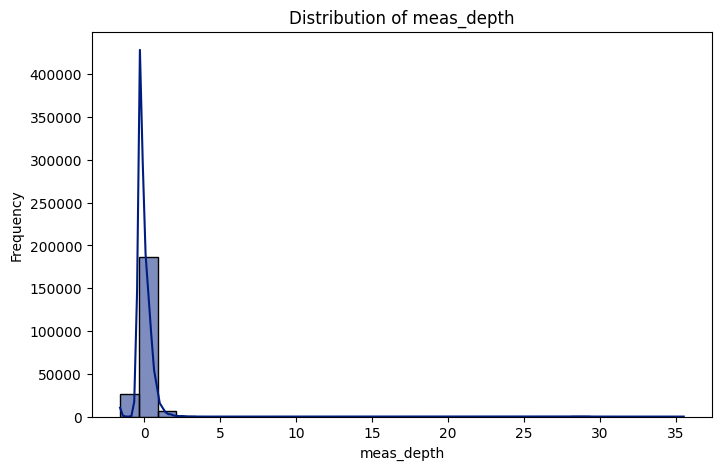

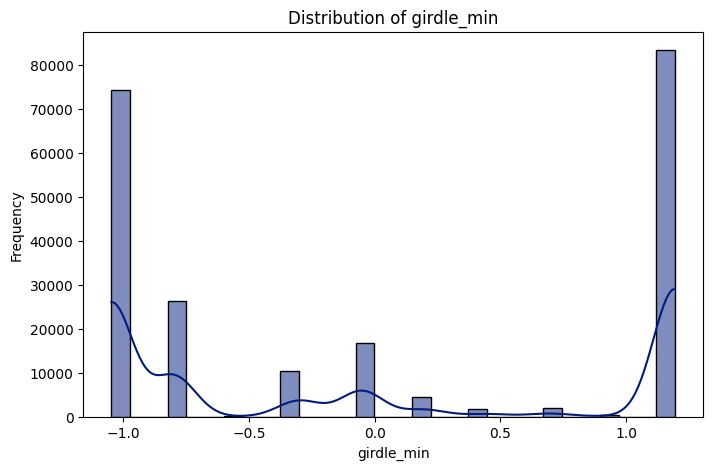

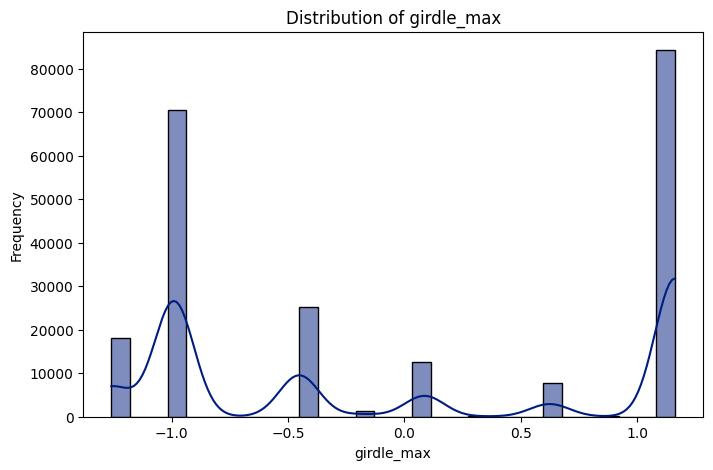

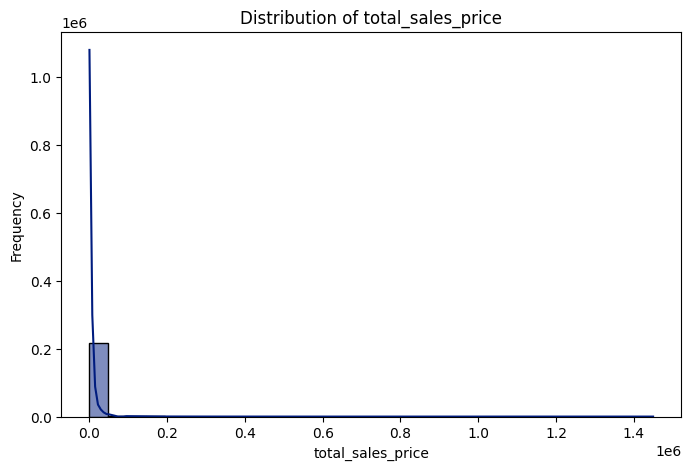

In [17]:
numerical_cols = ['carat_weight', 'depth_percent', 'table_percent', 'meas_length', 'meas_width', 'meas_depth', 'girdle_min', 'girdle_max', 'total_sales_price']
for column in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[column], bins=30, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


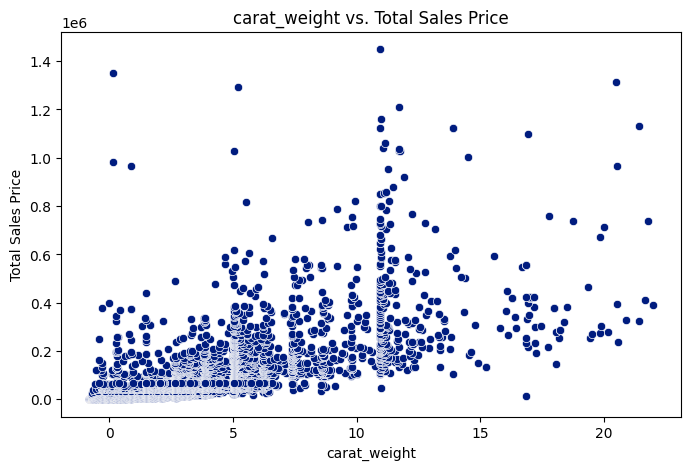

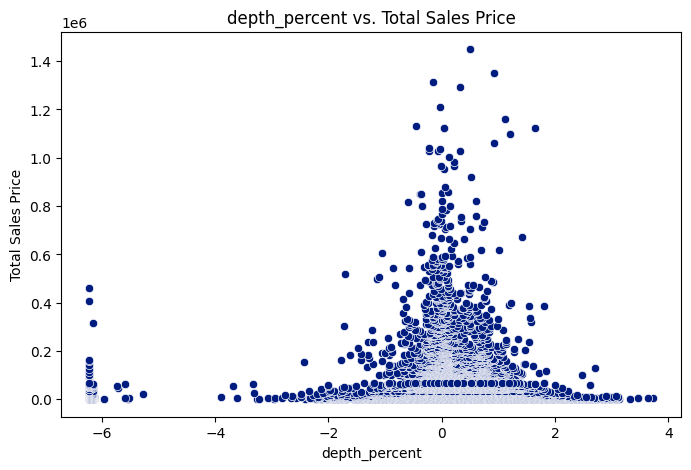

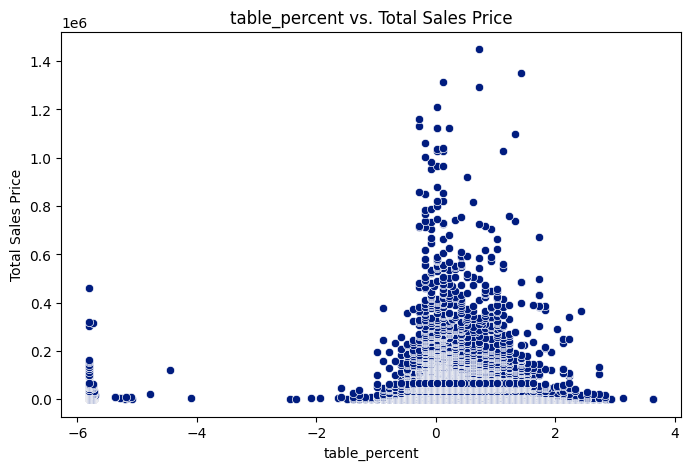

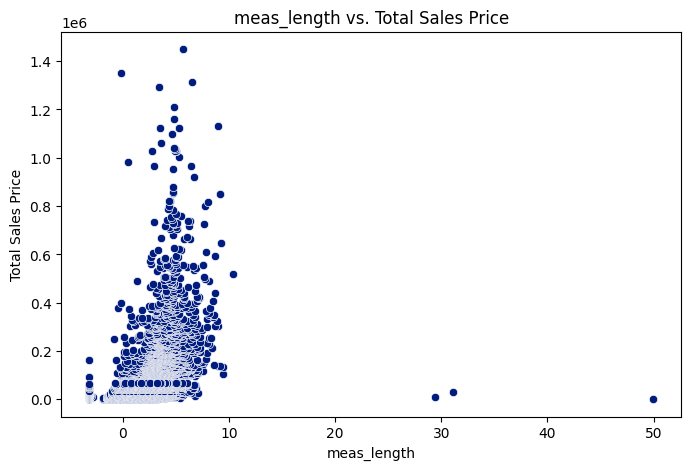

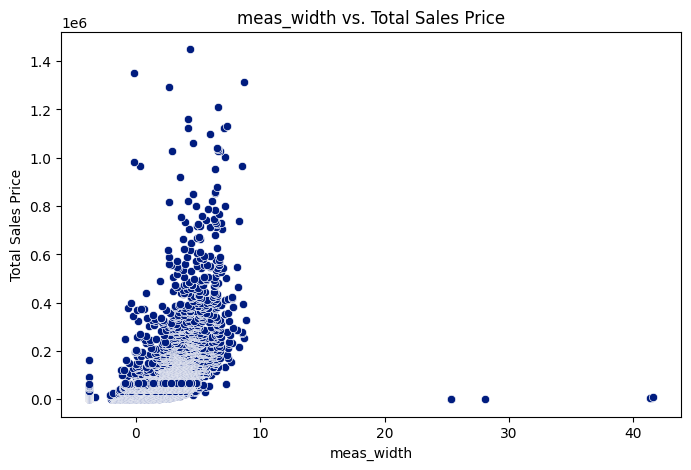

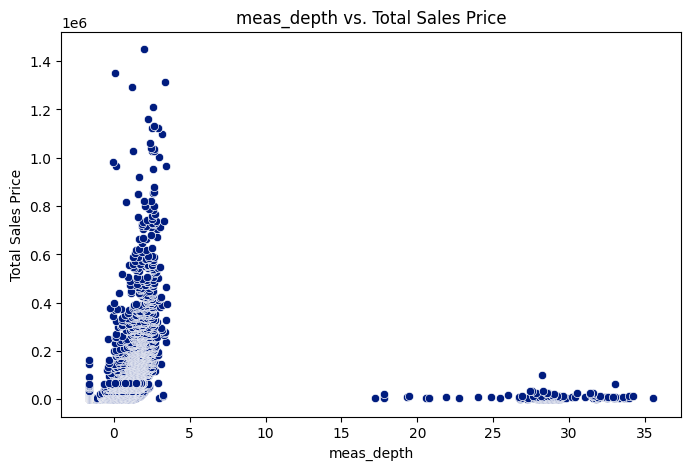

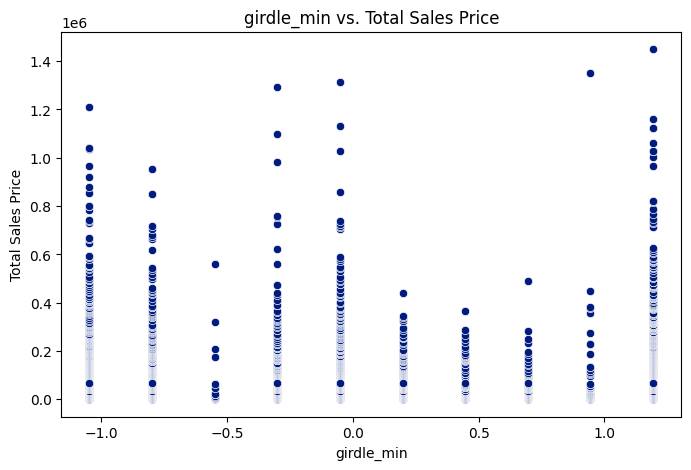

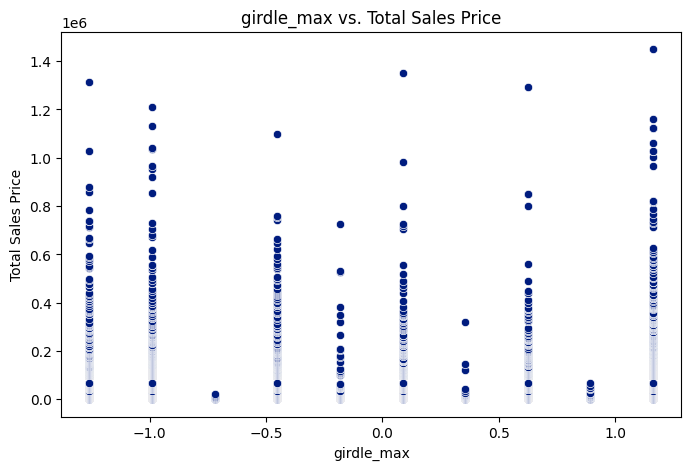

In [18]:
for column in numerical_cols[:-1]:  # Exclude 'total_sales_price'
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=df, x=column, y='total_sales_price')
    plt.title(f'{column} vs. Total Sales Price')
    plt.xlabel(column)
    plt.ylabel('Total Sales Price')
    plt.show()

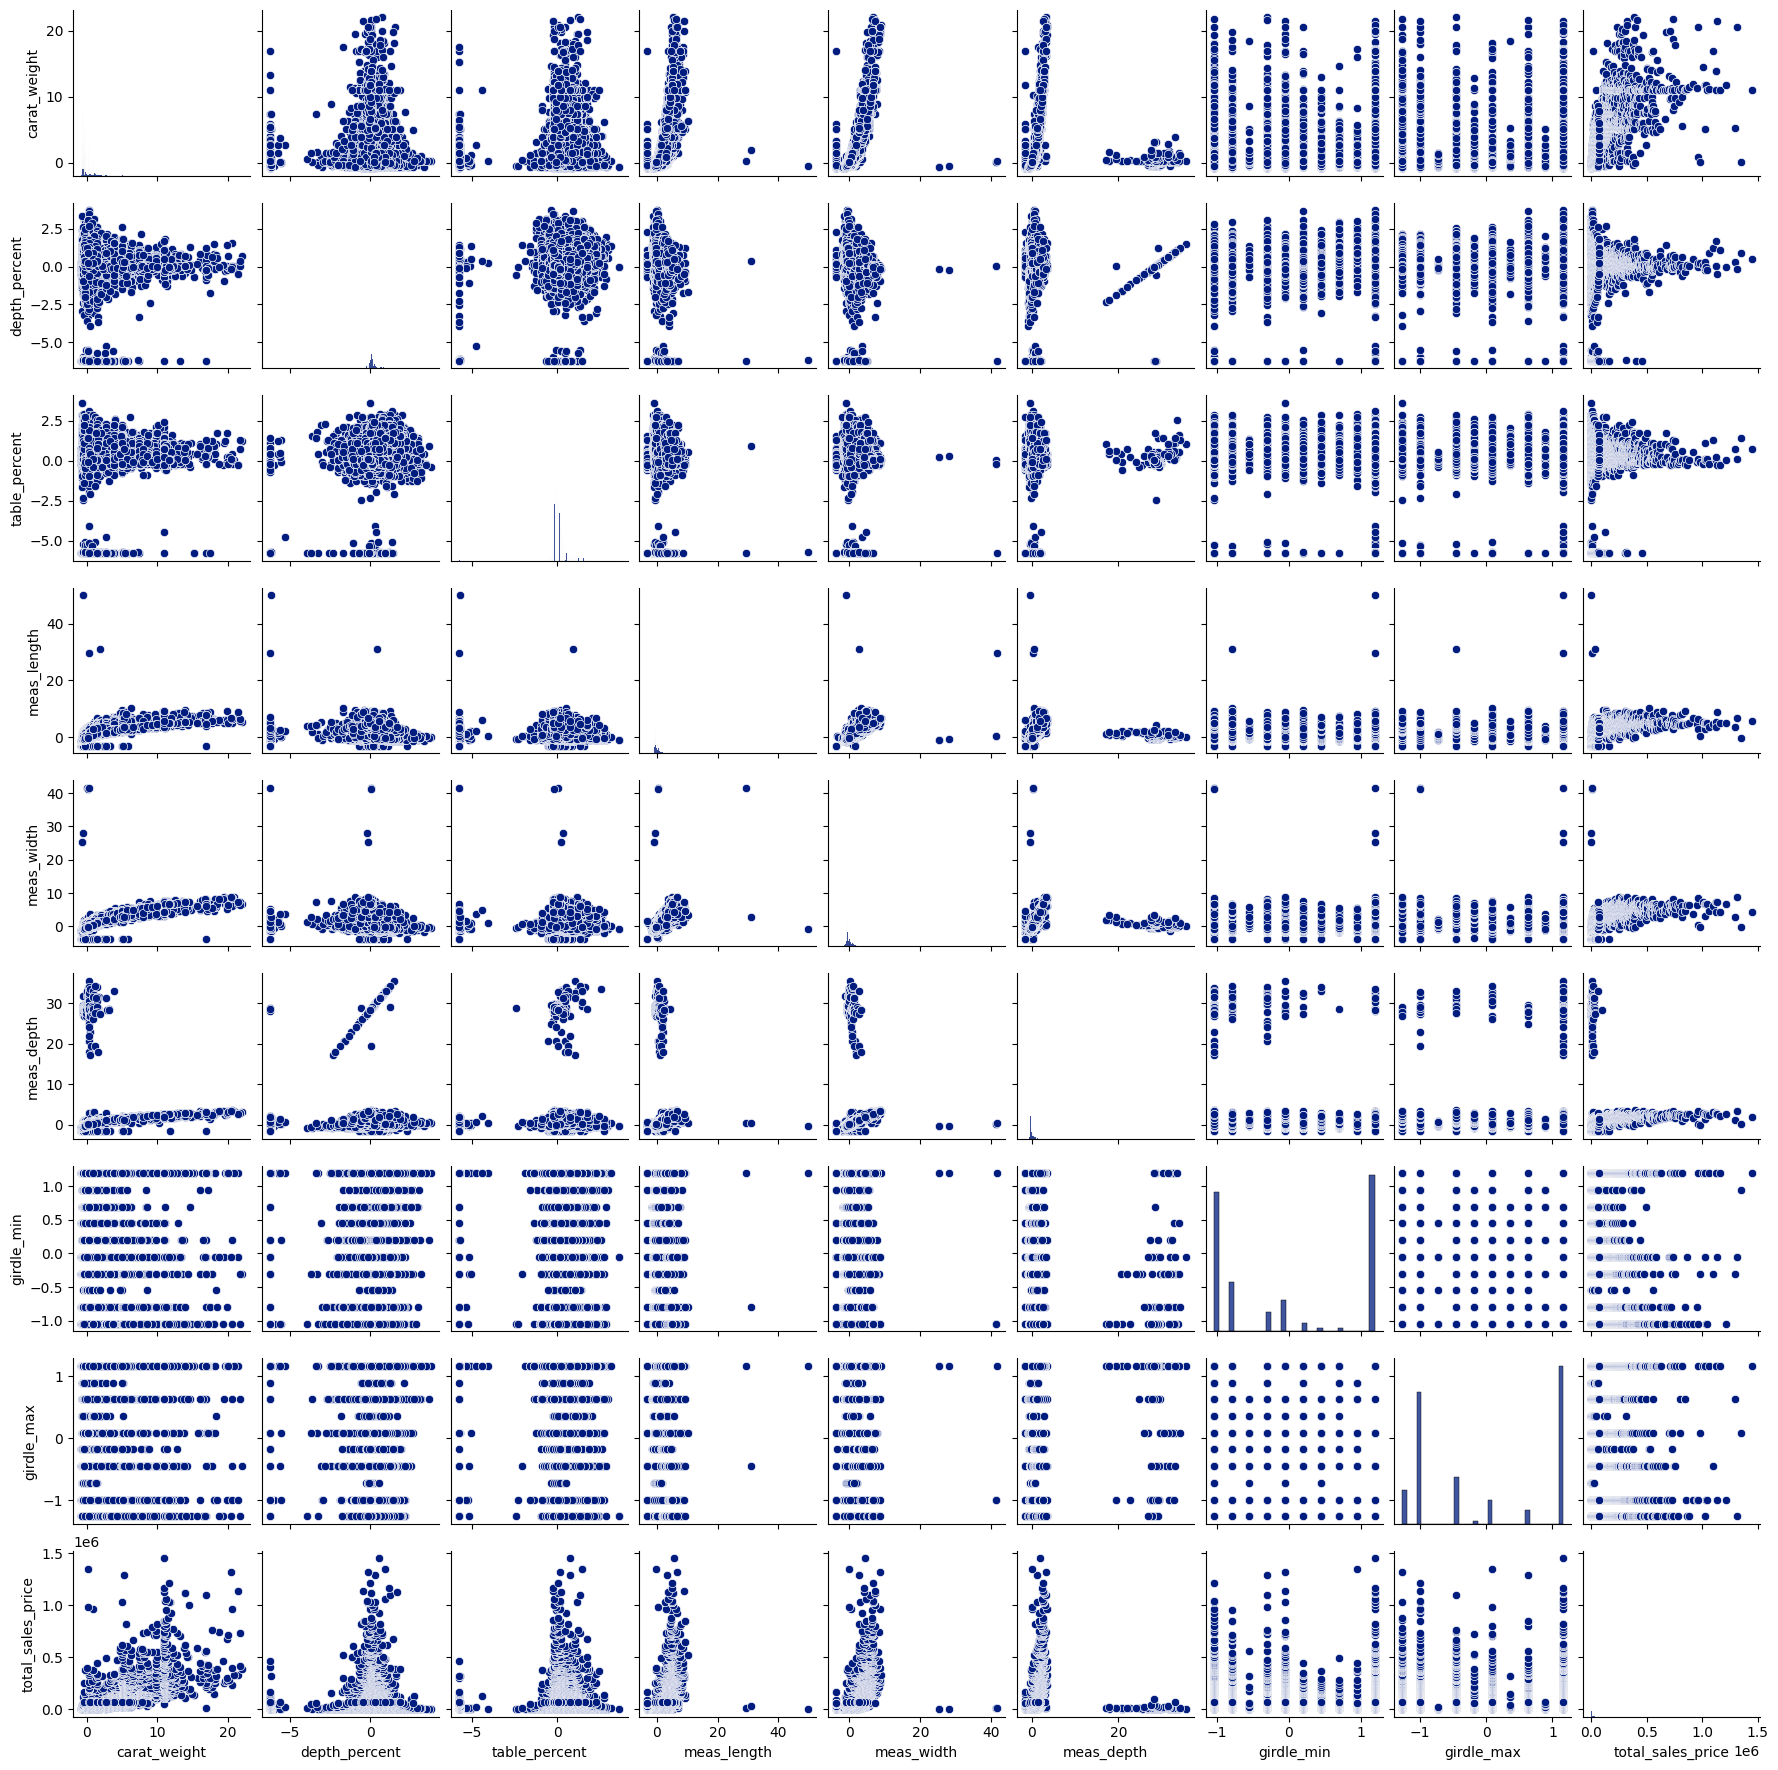

In [19]:
sns.pairplot(df[numerical_cols], height=2)
plt.show()

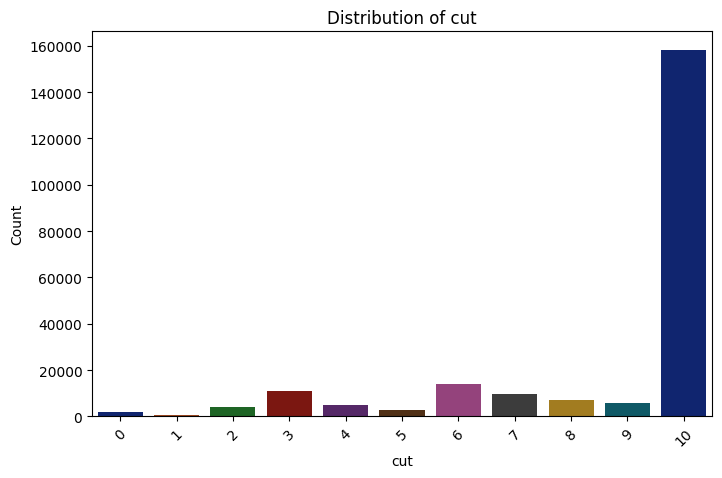

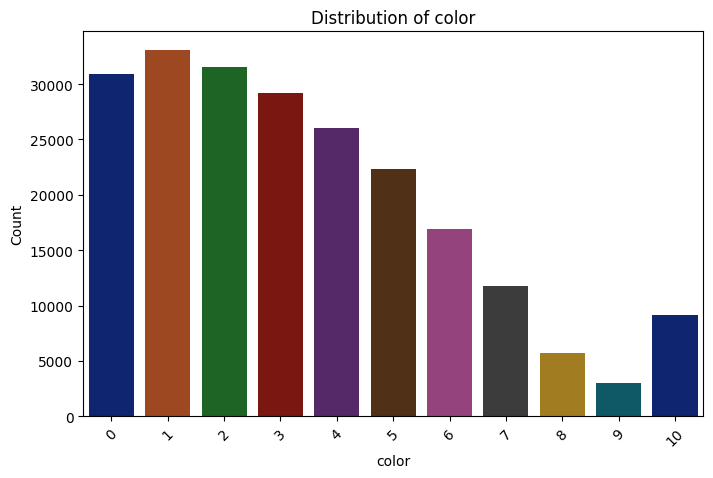

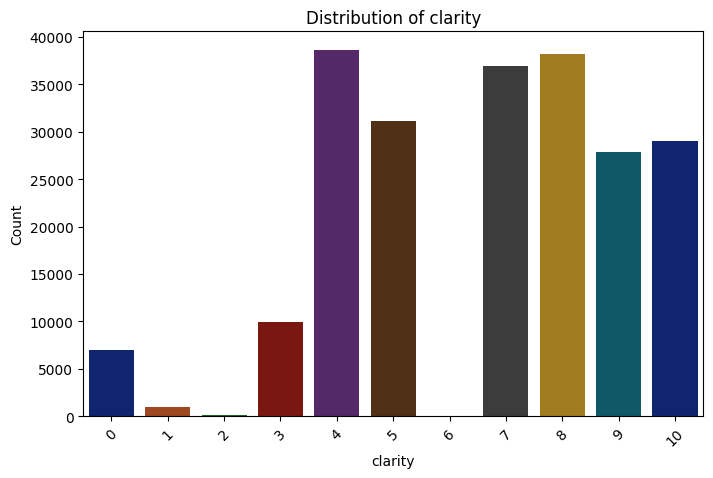

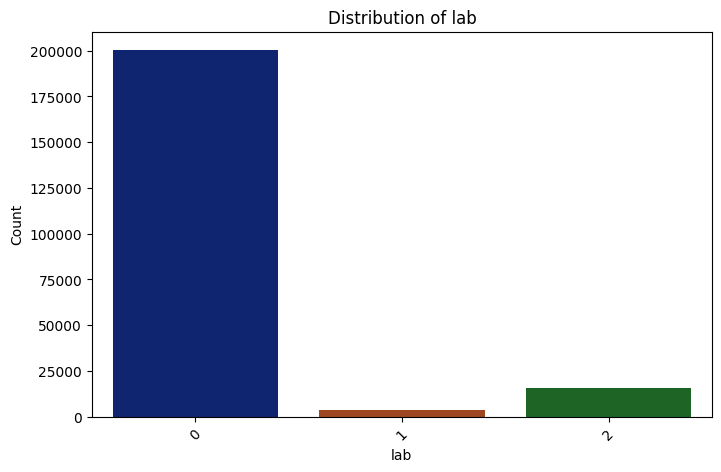

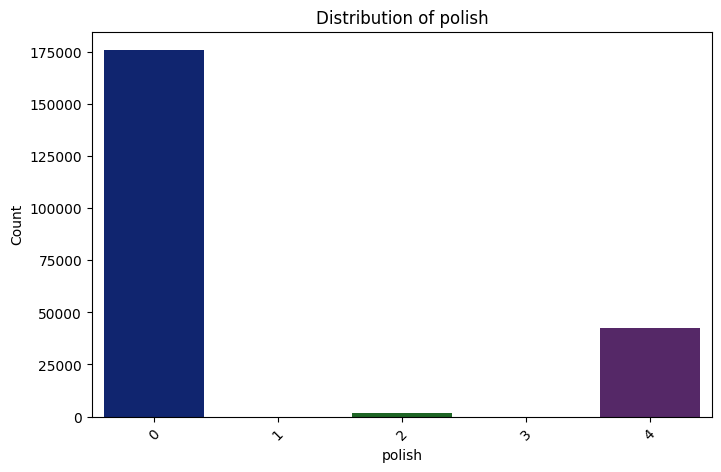

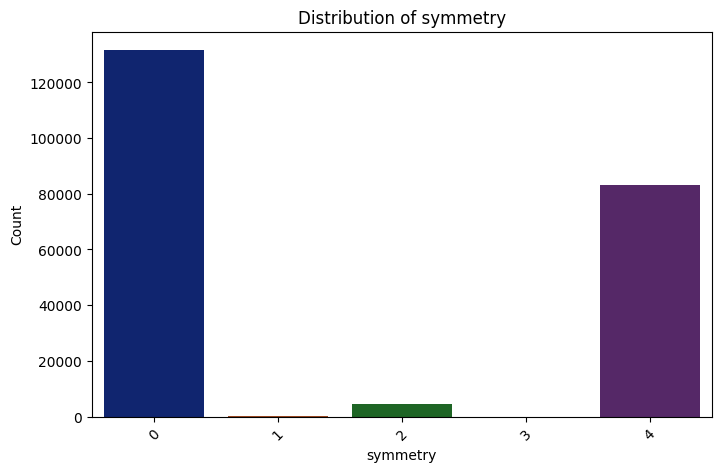

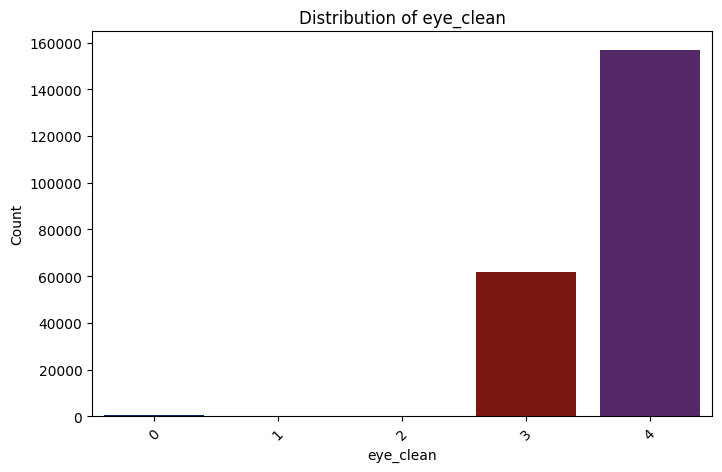

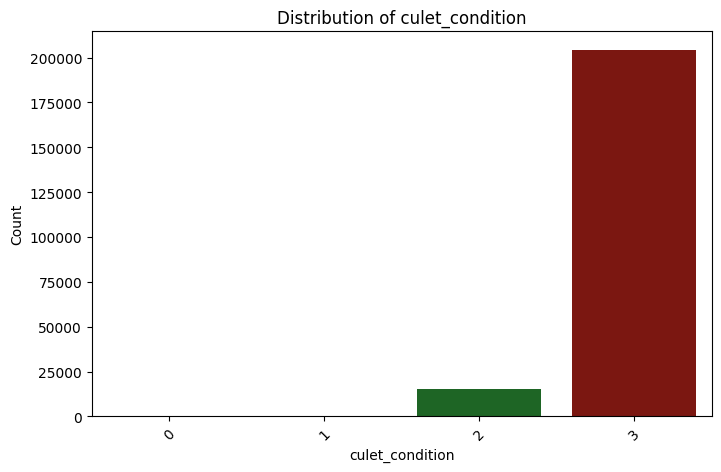

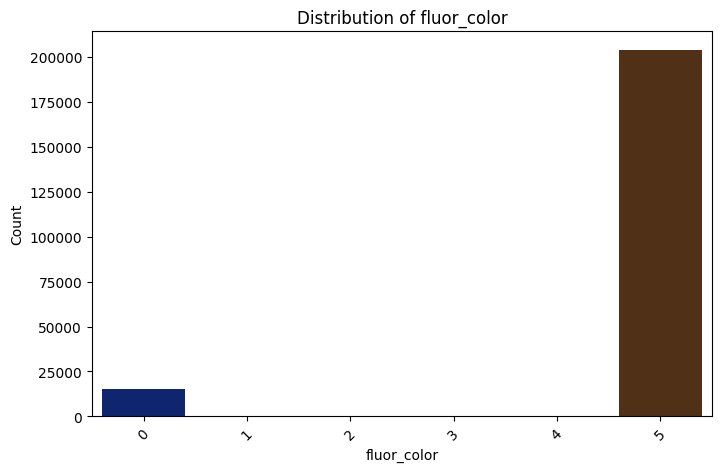

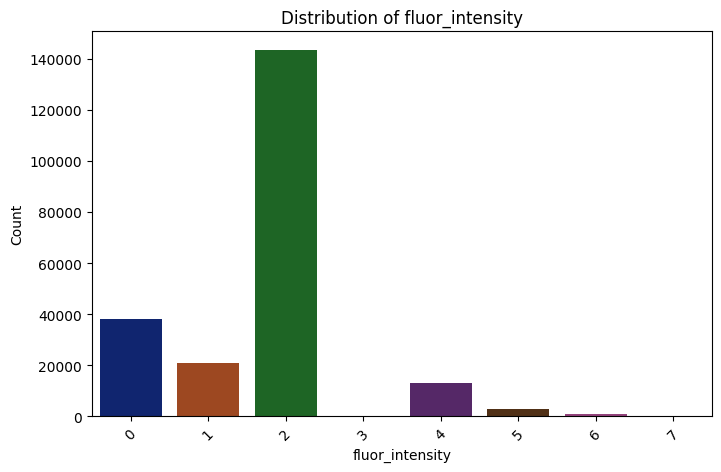

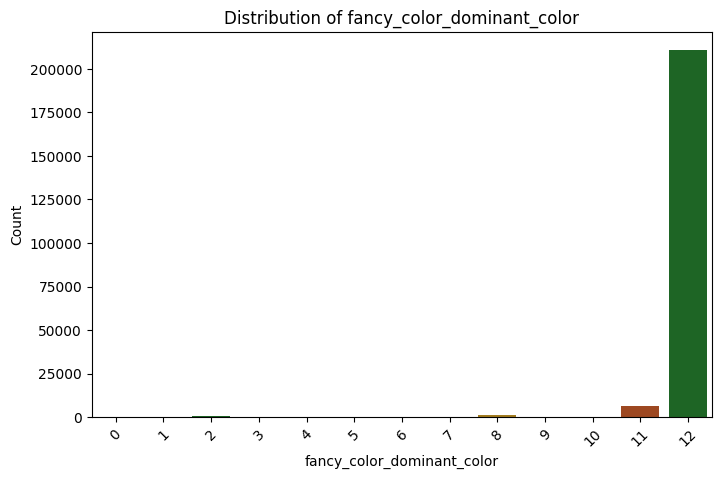

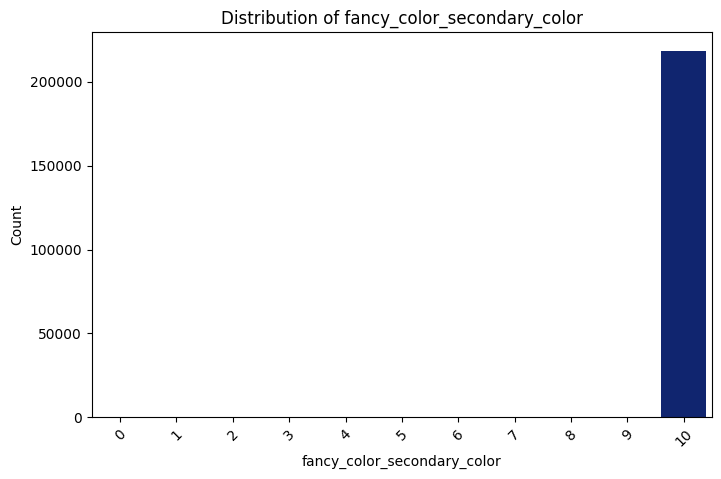

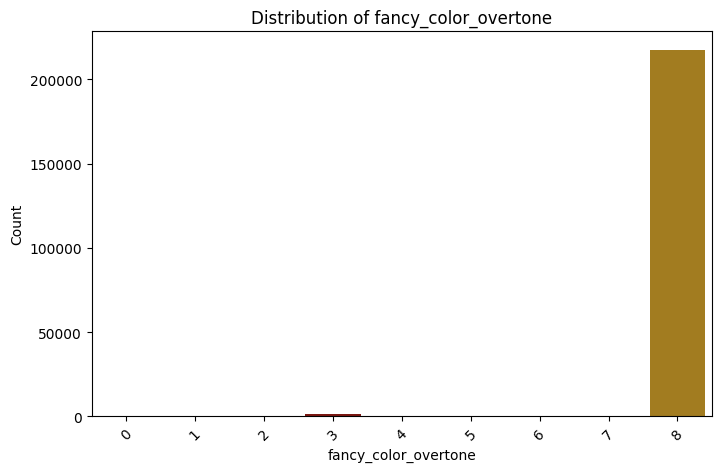

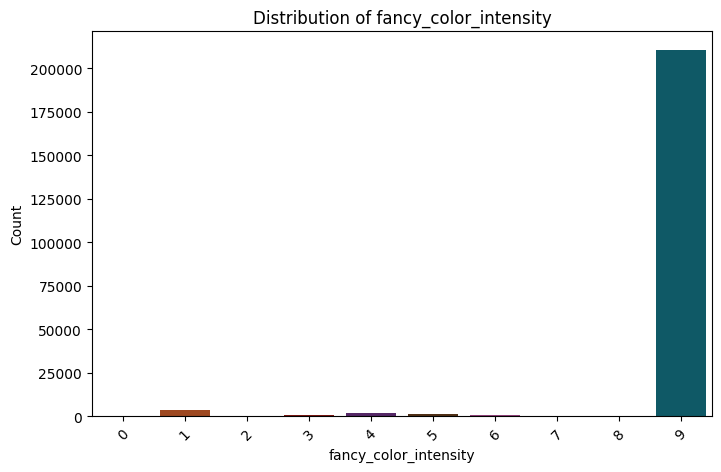

In [20]:
categorical_cols = ['cut', 'color', 'clarity', 'lab', 'polish', 'symmetry', 'eye_clean', 'culet_condition', 'fluor_color', 'fluor_intensity', 'fancy_color_dominant_color', 'fancy_color_secondary_color', 'fancy_color_overtone', 'fancy_color_intensity']
for column in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=column)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

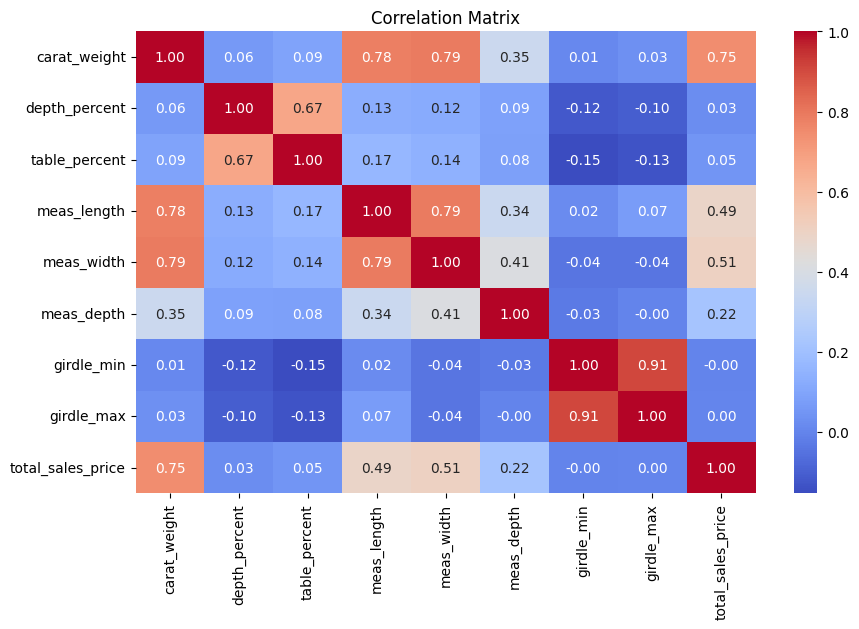

In [21]:
correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

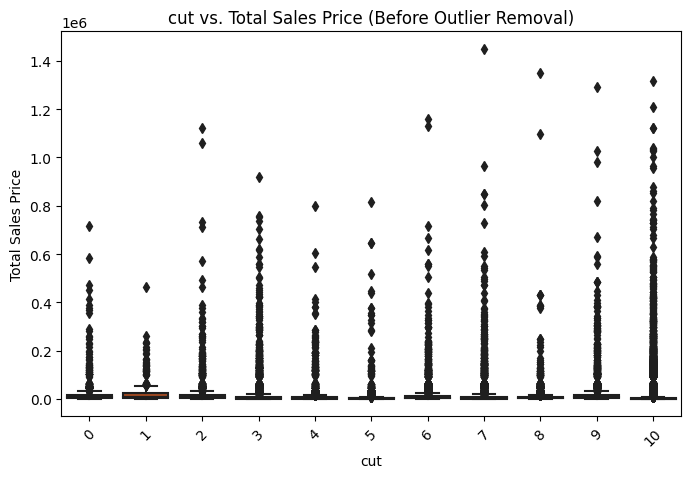

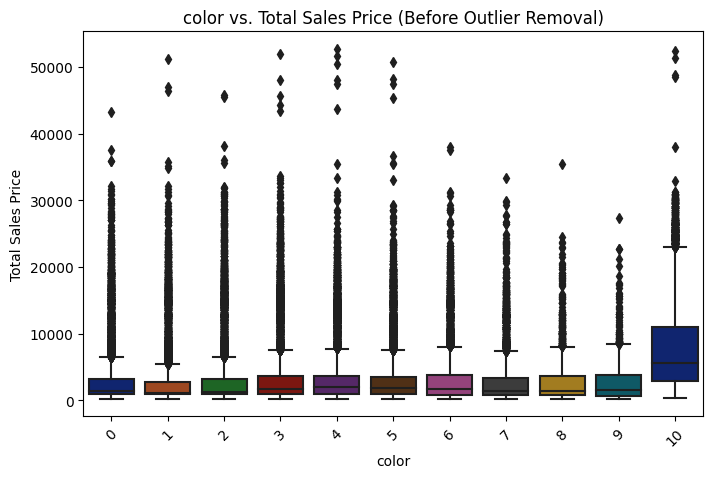

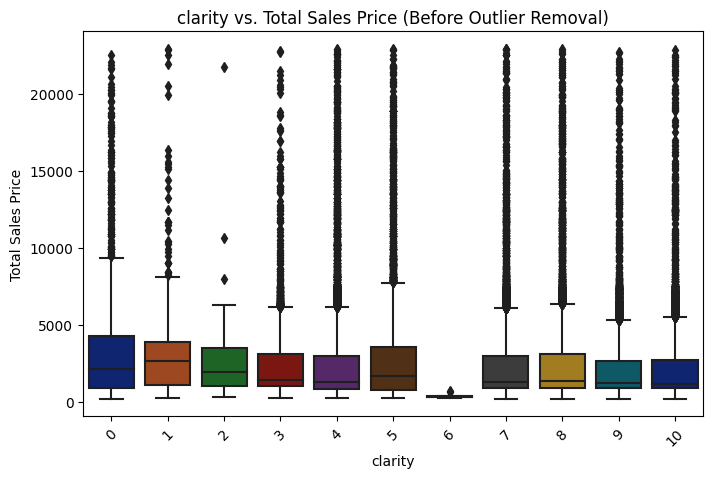

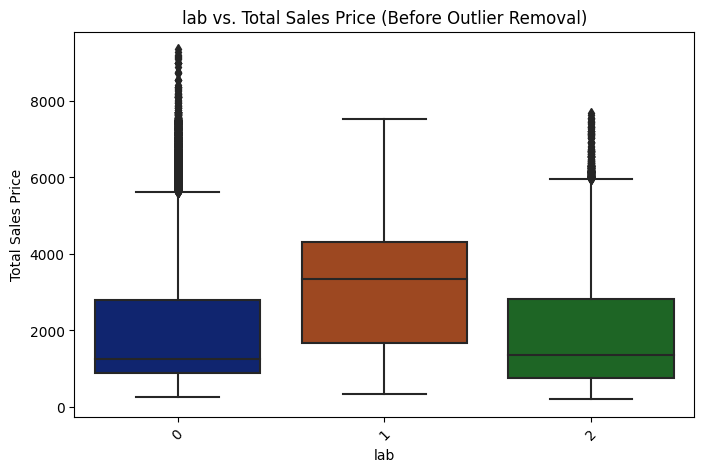

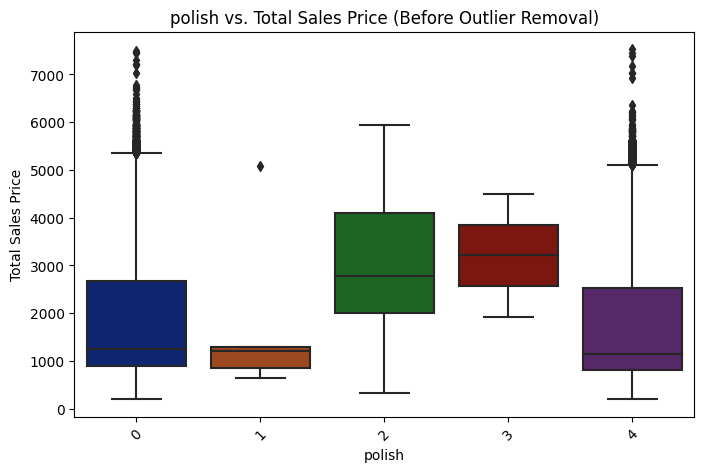

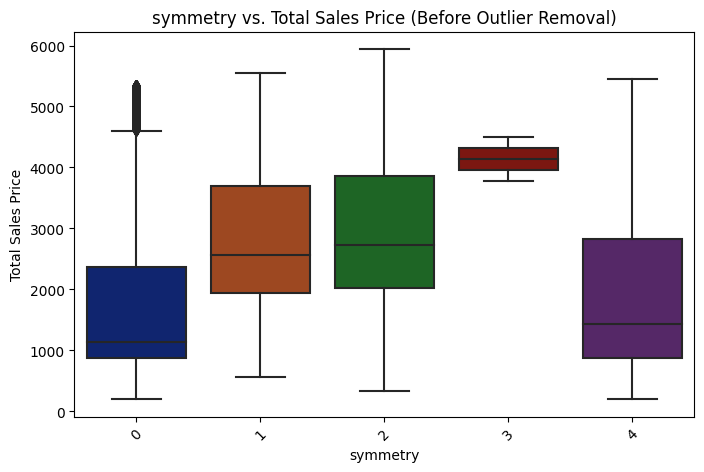

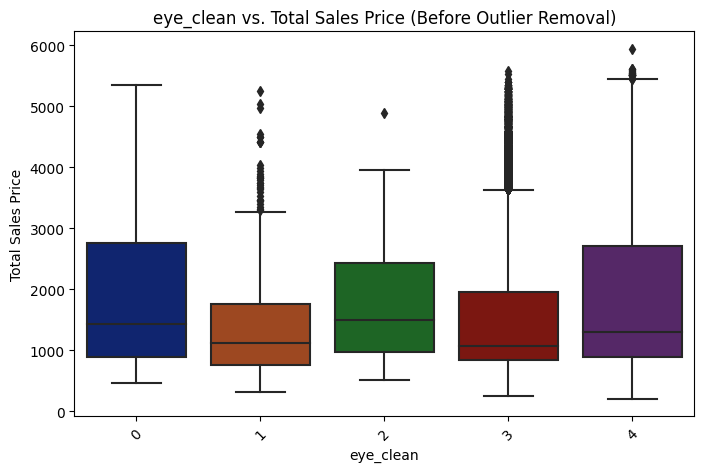

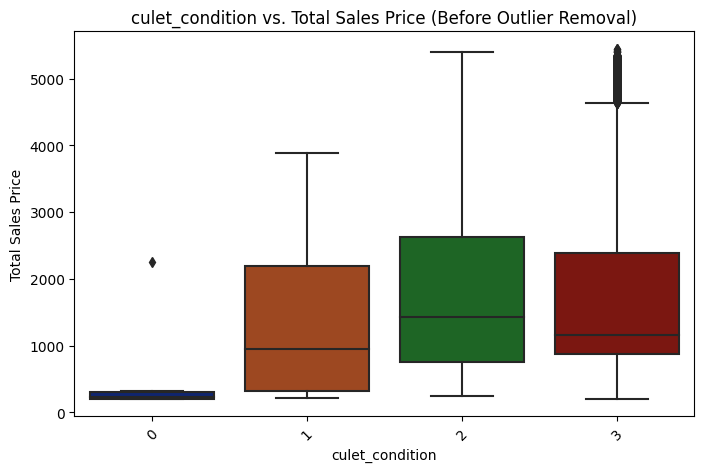

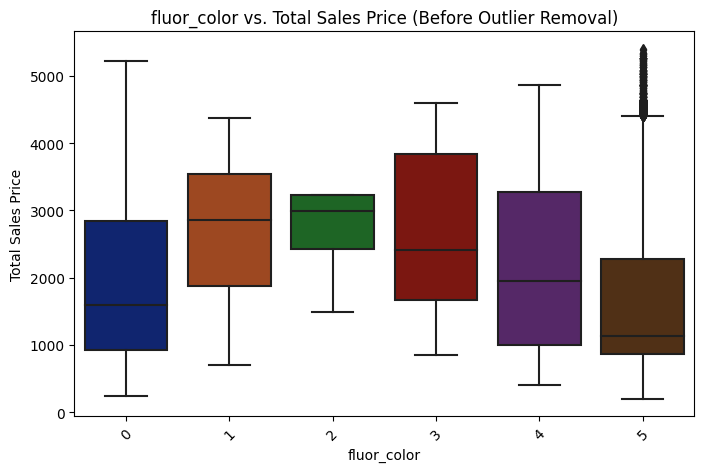

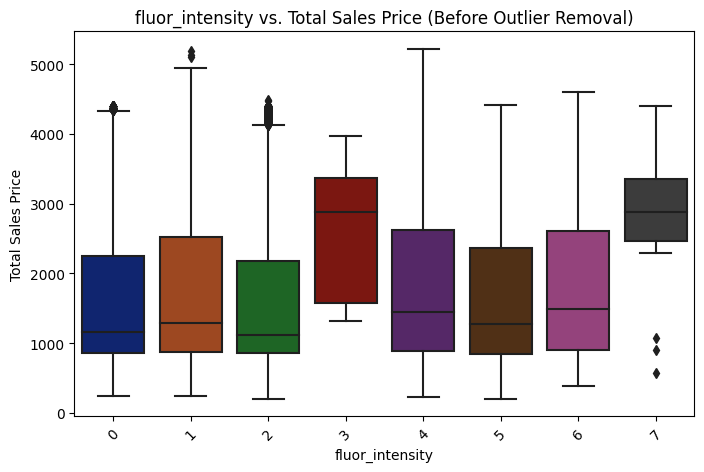

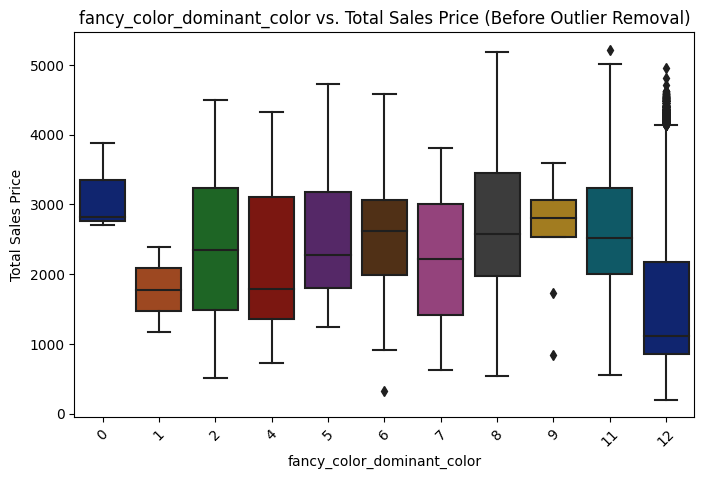

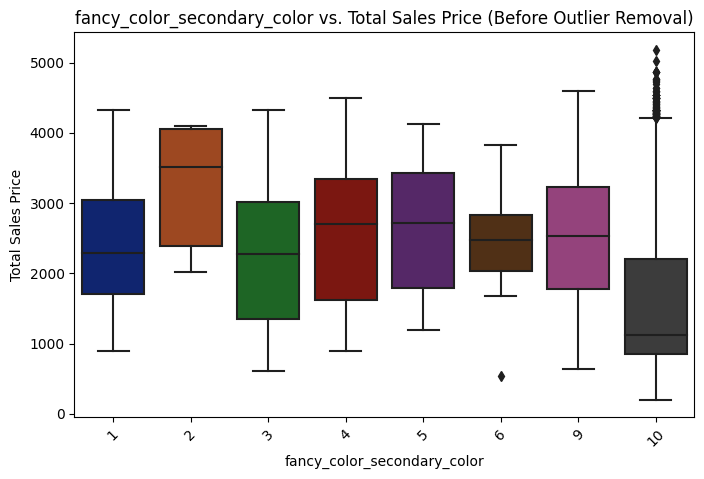

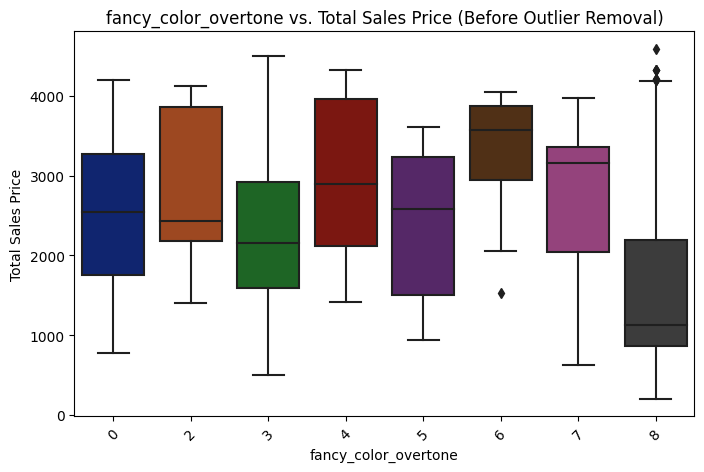

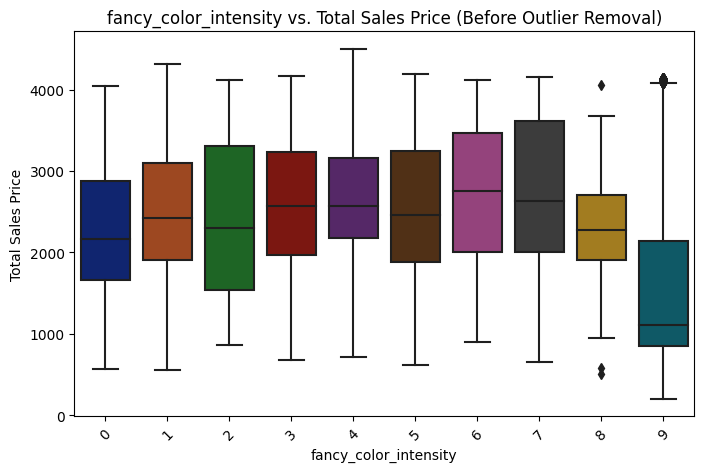

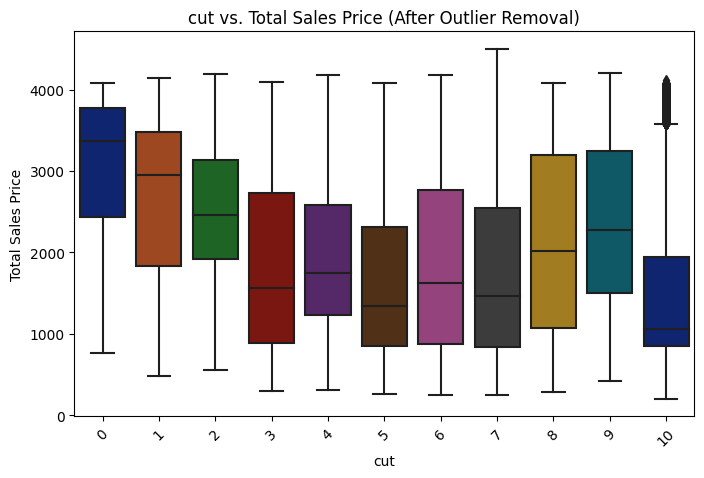

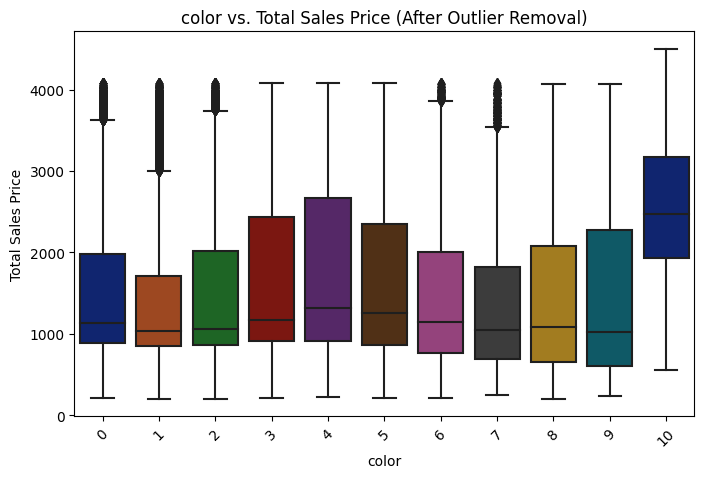

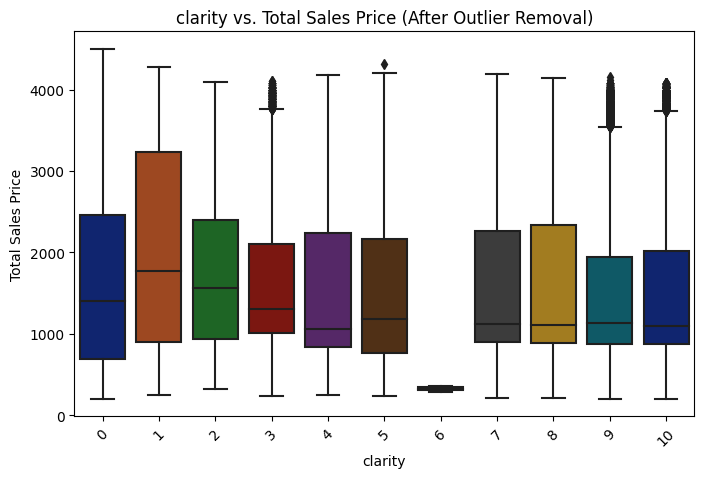

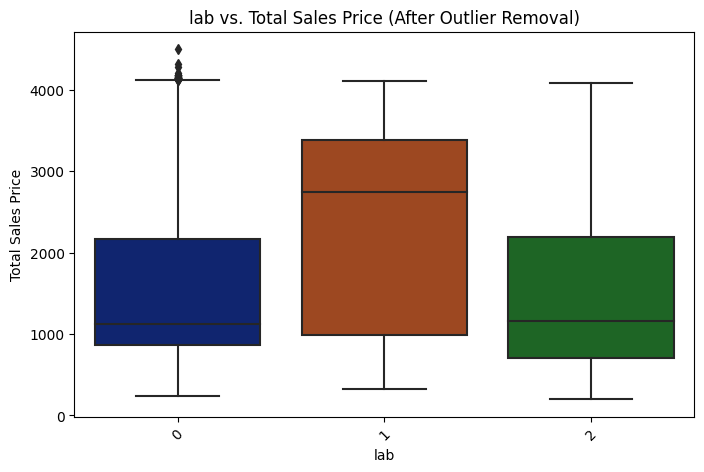

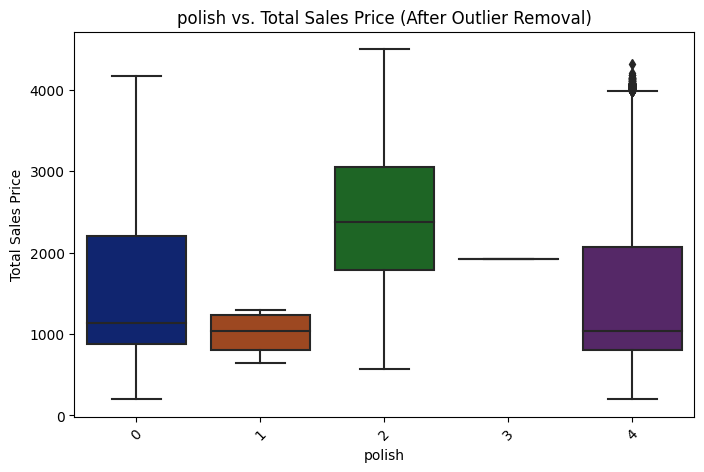

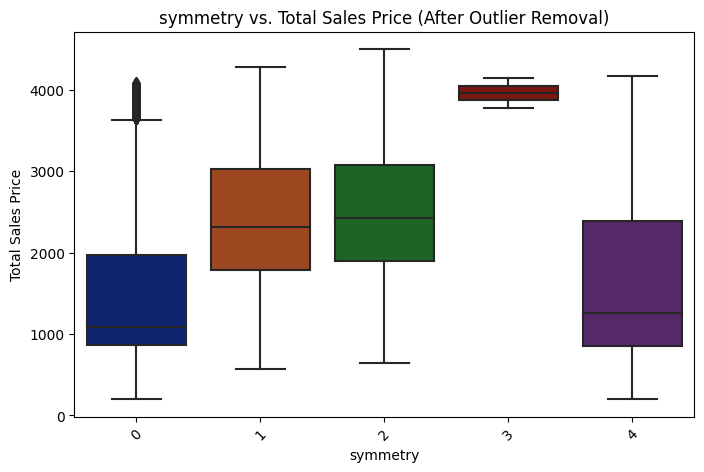

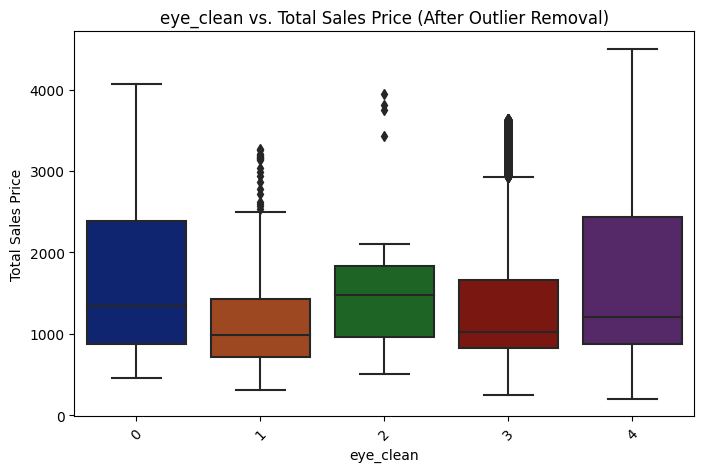

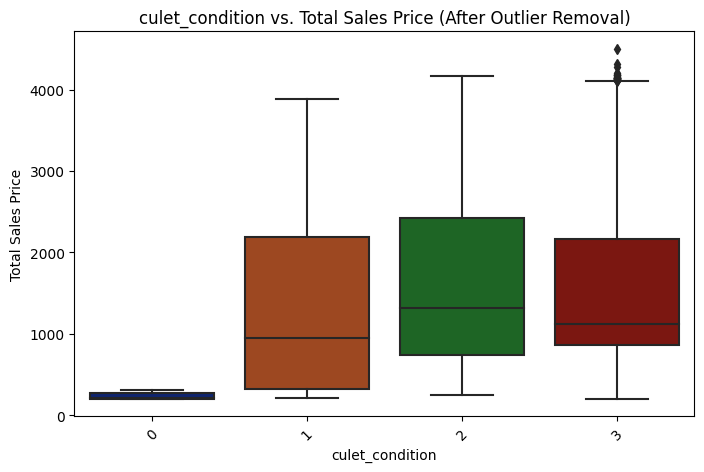

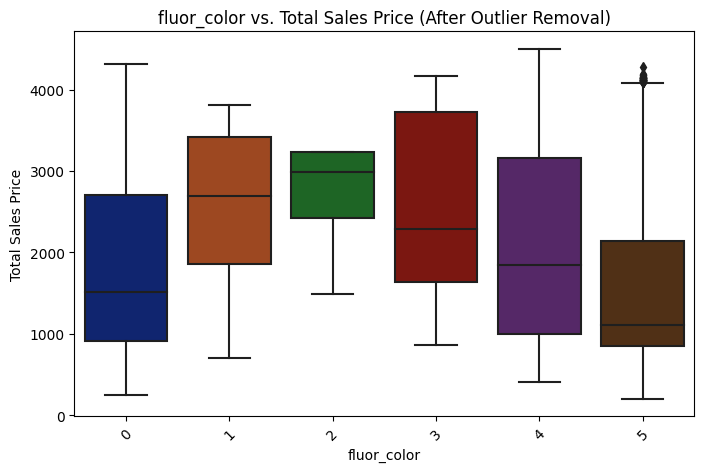

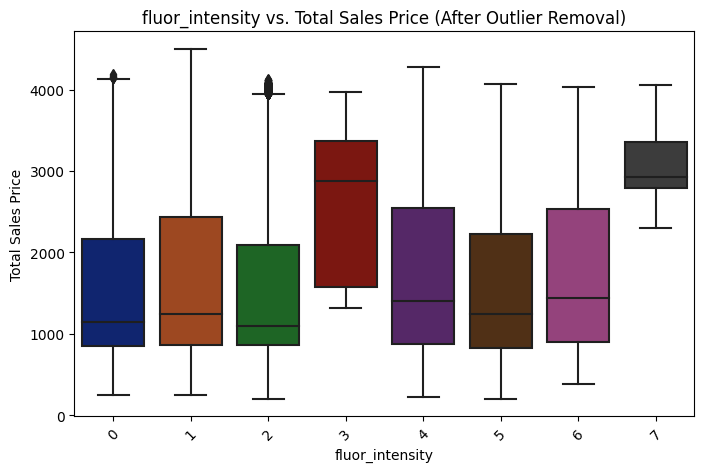

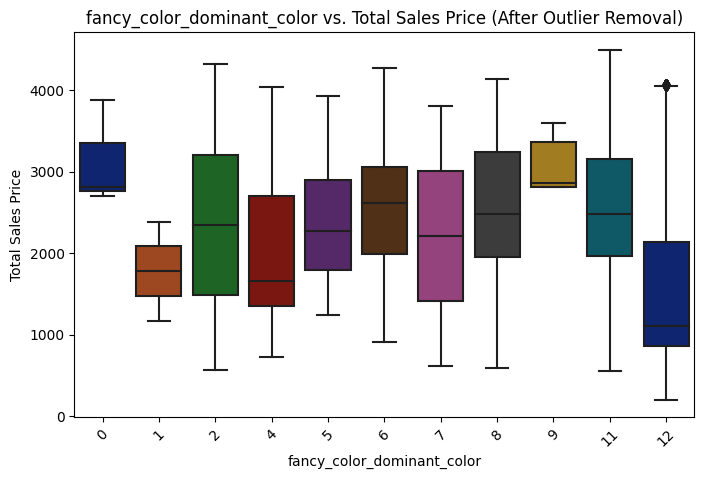

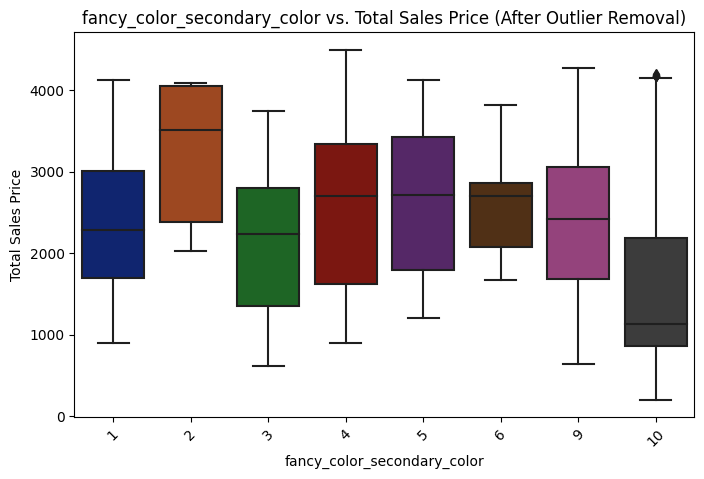

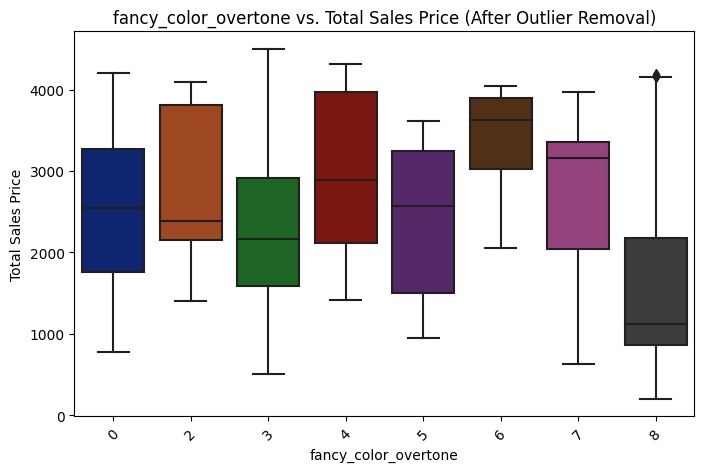

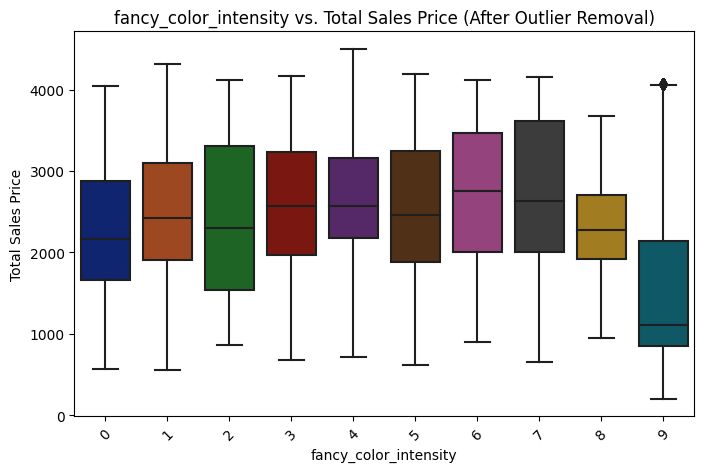

In [22]:
threshold=1.5
# Iterate through categorical columns
for column in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x=column, y='total_sales_price')
    plt.title(f'{column} vs. Total Sales Price (Before Outlier Removal)')
    plt.xlabel(column)
    plt.ylabel('Total Sales Price')
    plt.xticks(rotation=45)
    plt.show()

    # Identify and remove outliers for each category
    for category in df[column].unique():
        category_df = df[df[column] == category]
        q1 = category_df['total_sales_price'].quantile(0.25)
        q3 = category_df['total_sales_price'].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - threshold * iqr
        upper_bound = q3 + threshold * iqr

        # Filter and keep only data points within the bounds
        df = df[(df[column] != category) | ((df[column] == category) & (df['total_sales_price'] >= lower_bound) & (df['total_sales_price'] <= upper_bound))]

# Visualize the box plots after outlier removal
for column in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x=column, y='total_sales_price')
    plt.title(f'{column} vs. Total Sales Price (After Outlier Removal)')
    plt.xlabel(column)
    plt.ylabel('Total Sales Price')
    plt.xticks(rotation=45)
    plt.show()

In [23]:
df

,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,culet_size,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,10,1,10,-0.786360,0,2,4,4,4,3,...,-0.727899,-1.046233,-1.258519,5,2,12,10,8,9,200
1,10,1,10,-0.786360,4,2,4,4,4,3,...,-0.732765,-0.797402,-0.989494,5,2,12,10,8,9,200
2,10,1,10,-0.786360,0,2,4,4,4,8,...,-0.737632,-0.050912,-1.258519,5,2,12,10,8,9,200
3,10,1,10,-0.786360,0,2,4,4,4,8,...,-0.732765,-1.046233,-0.989494,5,2,12,10,8,9,200
4,10,1,10,-0.786360,4,2,4,0,4,3,...,-0.713299,-0.797402,-0.989494,5,2,12,10,8,9,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156354,2,10,7,0.313070,5,0,1,4,4,8,...,0.483888,1.193240,1.162709,5,0,11,10,8,5,4187
156534,9,10,5,0.147565,5,0,2,4,4,3,...,0.016693,0.695579,-0.989494,0,1,11,10,0,1,4200
157193,7,10,1,0.289427,5,0,1,2,4,8,...,0.128625,1.193240,1.162709,5,4,6,9,3,4,4275
158673,7,10,5,0.289427,5,0,2,4,4,3,...,0.216224,0.197919,0.624658,0,1,2,4,4,1,4320


In [24]:
from sklearn.model_selection import train_test_split

X = df.drop('total_sales_price', axis=1)  # Features
y = df['total_sales_price']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
from sklearn.linear_model import LinearRegression

# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

LinearRegression()

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Absolute Error: 296.10
Mean Squared Error: 176836.71
R-squared: 0.81


In [27]:
# Define a threshold for outlier removal (e.g., 1.5 times IQR)
threshold = 1.5

# Iterate through categorical columns and remove outliers
for column in categorical_cols:
    for category in df[column].unique():
        category_df = df[df[column] == category]
        q1 = category_df['total_sales_price'].quantile(0.25)
        q3 = category_df['total_sales_price'].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - threshold * iqr
        upper_bound = q3 + threshold * iqr
        df = df[(df[column] != category) | ((df[column] == category) & (df['total_sales_price'] >= lower_bound) & (df['total_sales_price'] <= upper_bound))]

# Split the data into training and testing sets
X = df.drop('total_sales_price', axis=1)  # Features
y = df['total_sales_price']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Continue with model evaluation, interpretation, and predictions as previously described

LinearRegression()

In [28]:
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Interpreting the model
coefficients = model.coef_
intercept = model.intercept_

print("Coefficients:")
for feature, coef in zip(X.columns, coefficients):
    print(f"{feature}: {coef:.2f}")

print(f"Intercept: {intercept:.2f}")

Mean Absolute Error: 115.55
Mean Squared Error: 24207.25
R-squared: 0.66
Coefficients:
cut: 7.41
color: -55.37
clarity: 31.65
carat_weight: 2741.06
cut_quality: -9.68
lab: -58.61
symmetry: -5.05
polish: -6.86
eye_clean: 12.60
culet_size: -1.43
culet_condition: 28.28
depth_percent: -7.92
table_percent: 1.87
meas_length: -27.99
meas_width: 19.41
meas_depth: 4.10
girdle_min: -11.45
girdle_max: -1.11
fluor_color: 16.03
fluor_intensity: 2.96
fancy_color_dominant_color: -29.51
fancy_color_secondary_color: -37.61
fancy_color_overtone: -34.79
fancy_color_intensity: -35.78
Intercept: 3382.53


In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Split the data into features (X) and the target variable (y)
X = df.drop('total_sales_price', axis=1)
y = df['total_sales_price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust n_estimators and other hyperparameters

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Absolute Error: 51.77
Mean Squared Error: 6011.97
R-squared: 0.92


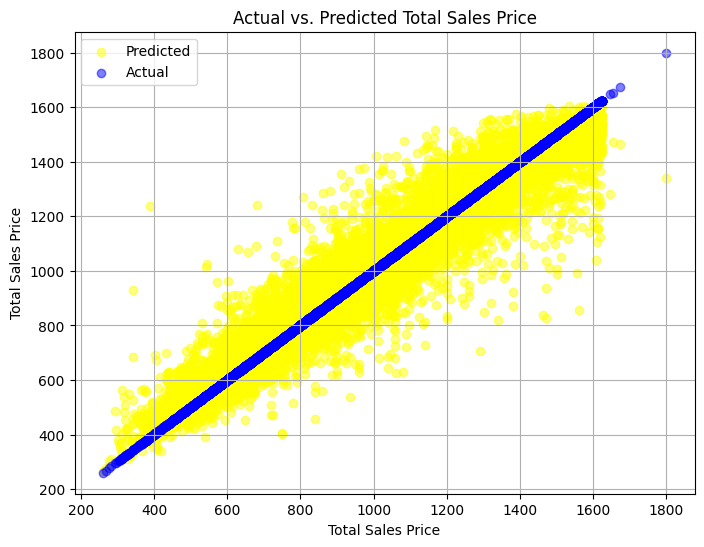

In [30]:
import matplotlib.pyplot as plt

# Plot the predicted values (yellow) vs. the actual values (blue)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, c='yellow', label='Predicted')  # Predicted values in yellow
plt.scatter(y_test, y_test, alpha=0.5, c='blue', label='Actual')  # Actual values in blue
plt.xlabel('Total Sales Price')
plt.ylabel('Total Sales Price')
plt.title('Actual vs. Predicted Total Sales Price')
plt.grid(True)

# Add a legend to distinguish between actual and predicted values
plt.legend(loc='upper left')

plt.show()

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Split the data into features (X) and the target variable (y)
X = df.drop('total_sales_price', axis=1)
y = df['total_sales_price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter Tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error',  # You can use other scoring metrics
                           cv=5,  # Adjust cross-validation folds as needed
                           verbose=1,
                           n_jobs=-1)  # Use multiple CPU cores

grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

# Create the optimized Random Forest model
optimized_model = RandomForestRegressor(random_state=42, **best_params)

# Fit the model to the training data
optimized_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = optimized_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Fitting 5 folds for each of 81 candidates, totalling 405 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


KeyboardInterrupt: ignored

In [ ]:
import matplotlib.pyplot as plt

# Plot the predicted values (yellow) vs. the actual values (blue)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, c='yellow', label='Predicted')  # Predicted values in yellow
plt.scatter(y_test, y_test, alpha=0.5, c='blue', label='Actual')  # Actual values in blue
plt.xlabel('Total Sales Price')
plt.ylabel('Total Sales Price')
plt.title('Actual vs. Predicted Total Sales Price')
plt.grid(True)

# Add a legend to distinguish between actual and predicted values
plt.legend(loc='upper left')

plt.show()